In [3]:
import  tensorflow as tf
import  numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
sess=tf.Session()

In [5]:
iris=datasets.load_iris()
x_vals=np.array([[x[1],x[2],x[3]] for x in iris.data])
y_vals=np.array([y[0] for y in iris.data])

In [49]:
#模型定义
batch_size=20
learning_rate=0.0001 # lr 太大时导致nan 
x_data=tf.placeholder(shape=[None,3],dtype=tf.float32)
y_target=tf.placeholder(shape=[None,1],dtype=tf.float32)
A=tf.Variable(tf.random_normal(shape=[3,1]))
b=tf.Variable(tf.random_normal(shape=[1,1])) # 偏置参数
model_output=tf.add(tf.matmul(x_data,A),b)


In [54]:
elastic_param1 = tf.constant(0.1)
elastic_param2 = tf.constant(0.1)
l1_loss=tf.reduce_mean(tf.abs(A))
l2_loss=tf.reduce_mean(tf.square(A))
e1_term = tf.multiply(elastic_param1, l1_loss)
e2_term = tf.multiply(elastic_param2, l2_loss)
loss = tf.expand_dims(tf.add(tf.add(tf.reduce_mean(tf.square(y_target - model_output)), l1_loss), l2_loss), 0)

In [51]:
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)

In [2]:
loss_vec = []
for i in range(1000):
     rand_index = np.random.choice(len(x_vals), size=batch_size)
     rand_x = x_vals[rand_index]
     rand_y = np.transpose([y_vals[rand_index]])
     sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
     temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
     loss_vec.append(temp_loss[0])
     if (i+1)%250==0:
         print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
         print('Loss = ' + str(temp_loss))


NameError: name 'np' is not defined

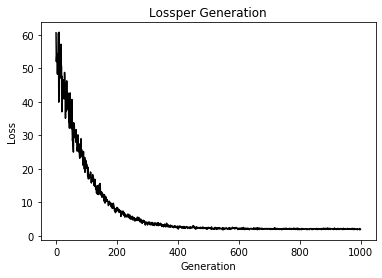

In [53]:
plt.plot(loss_vec, 'k-')
plt.title('Lossper Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()

